Ensemble Dataset time range: 2016-11-01T00:00:00.000000000 to 2016-11-05T23:00:00.000000000
Reference Dataset time range: 2016-01-01T00:00:00.000000000 to 2016-12-31T00:00:00.000000000
Common time bounds: {'start_time': np.datetime64('2016-11-01T00:00:00.000000000'), 'end_time': np.datetime64('2016-11-05T23:00:00.000000000')}
Subset Ensemble Dataset time range: 2016-11-01T00:00:00.000000000 to 2016-11-05T23:00:00.000000000


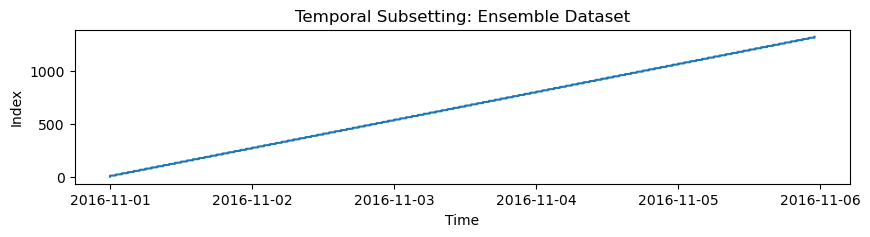

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(".."))


# Import the temporal subsetting functions from your script
from data_loading.subset_time import get_common_time_range, subset_time

# Load the ensemble dataset and a reference dataset.
# Adjust the file paths if needed.
ensemble_ds = xr.open_dataset('../data/test_subset_ensemble.nc', chunks={"time": 100})
reference_ds = xr.open_dataset('../data/SPARTACUS2-DAILY_RR_2016.nc')

# Print dataset summaries for debugging
print("Ensemble Dataset time range:", ensemble_ds.time.values[0], "to", ensemble_ds.time.values[-1])
print("Reference Dataset time range:", reference_ds.time.values[0], "to", reference_ds.time.values[-1])

# Get the common time range between the datasets
common_time_bounds = get_common_time_range(ensemble_ds, reference_ds)
print("Common time bounds:", common_time_bounds)

# Subset the ensemble dataset to the common time range
ensemble_time_subset = subset_time(ensemble_ds, time_bounds=common_time_bounds)

# Verify the new time dimension after subsetting
print("Subset Ensemble Dataset time range:", ensemble_time_subset.time.values[0], "to", ensemble_time_subset.time.values[-1])

# Optionally, plot the time coordinate to visualize the range
plt.figure(figsize=(10, 2))
plt.plot(pd.to_datetime(ensemble_time_subset.time.values), range(len(ensemble_time_subset.time)))
plt.xlabel("Time")
plt.ylabel("Index")
plt.title("Temporal Subsetting: Ensemble Dataset")
plt.show()
